In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Names and PRN for all group members:
- Name: ______________________
- PRN:  ______________________
- Date: ______________________

# Deep Neural Networks
## A07: Group Assignment


##  Convolutional Neural Network (CNN)

- Flowers Dataset


In [68]:
###-----------------
### Import Libraries
###-----------------
import os
import gc
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

parent_dir = os.path.abspath('..')
sys.path.insert(0, parent_dir)


from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix, fn_plot_label
from utils.configuration import Config

In [5]:
###----------------------
### Some basic parameters
###----------------------

inpDir = os.path.join('..', 'input')
outDir = '../output'
modelDir = '../models'
subDir = 'flower_photos'
altName = 'base_model'

TEST_SIZE = .2
BATCH_SIZE = 32
RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible results
tf.random.set_seed(RANDOM_STATE)

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

CMAP = 'brg' # plt.cm.Spectral

plt.rcParams.update(params)

In [6]:
data_dir = os.path.join(inpDir, subDir)
os.listdir(data_dir)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [7]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Load Dataset

Images are under flower_photos

     |- daisy
     |- dandelion
     |- roses
     |- sunflowers
     |- tulips

In [9]:
'''
    For reading from web link
'''

#import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file(origin=dataset_url,
#                                   fname='flower_photos',
#                                   untar=True)
#data_dir = pathlib.Path(data_dir)
'''
    For reading from local directory
'''
data_dir = os.path.join(inpDir, subDir)

In [10]:
# use f1 score to tune

In [11]:
data_dir = os.path.join(inpDir, subDir)
os.listdir(data_dir)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [12]:
train_ds =  tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                                seed = RANDOM_STATE,
                                                                subset = 'training',
                                                                validation_split = TEST_SIZE)

test_ds =  tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                                seed = RANDOM_STATE,
                                                                subset = 'validation',
                                                                validation_split = TEST_SIZE)
                                                                

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
# is it getting the class names
class_names = train_ds.class_names
num_classes = len(class_names)
display(class_names, num_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

5

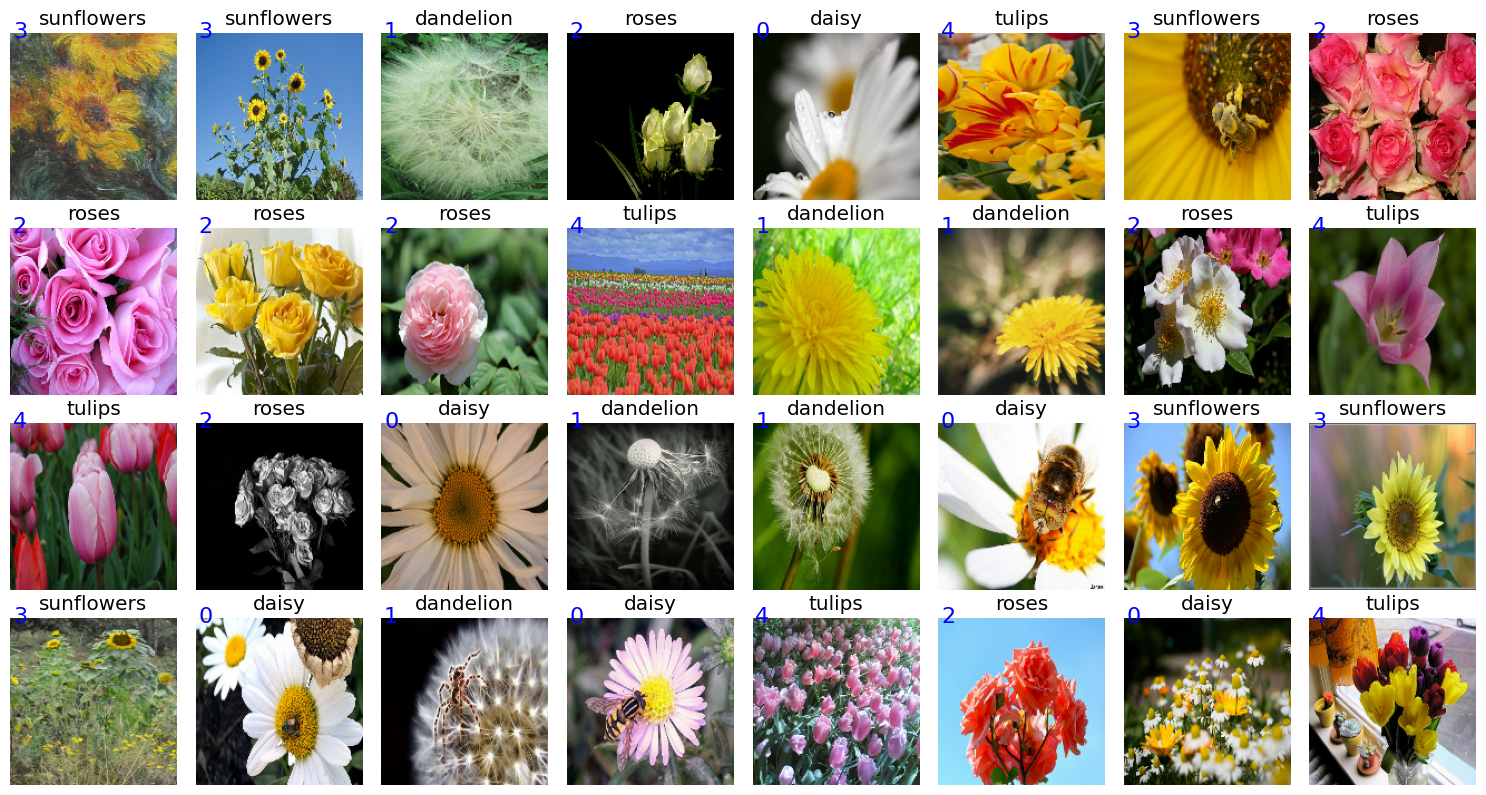

In [14]:
for images, labels in train_ds.take(1):

    for i in range(BATCH_SIZE):
        plt.subplot(BATCH_SIZE//8, 8 ,i+1)

        plt.grid(False)

        plt.imshow(images[i].numpy().astype('uint8'), cmap = plt.cm.binary)

        # add the class nameof the image in red text above the numeric label
        plt.title(class_names[labels[i].numpy()])

        # add the numeric label of the image in blue text at a specific position
        plt.text(2, 4, labels[i].numpy(), color = 'b', fontsize = 16)

        # switching off axis
        plt.axis('off')
    plt.tight_layout()
    #display the entire grid of image
    plt.show()


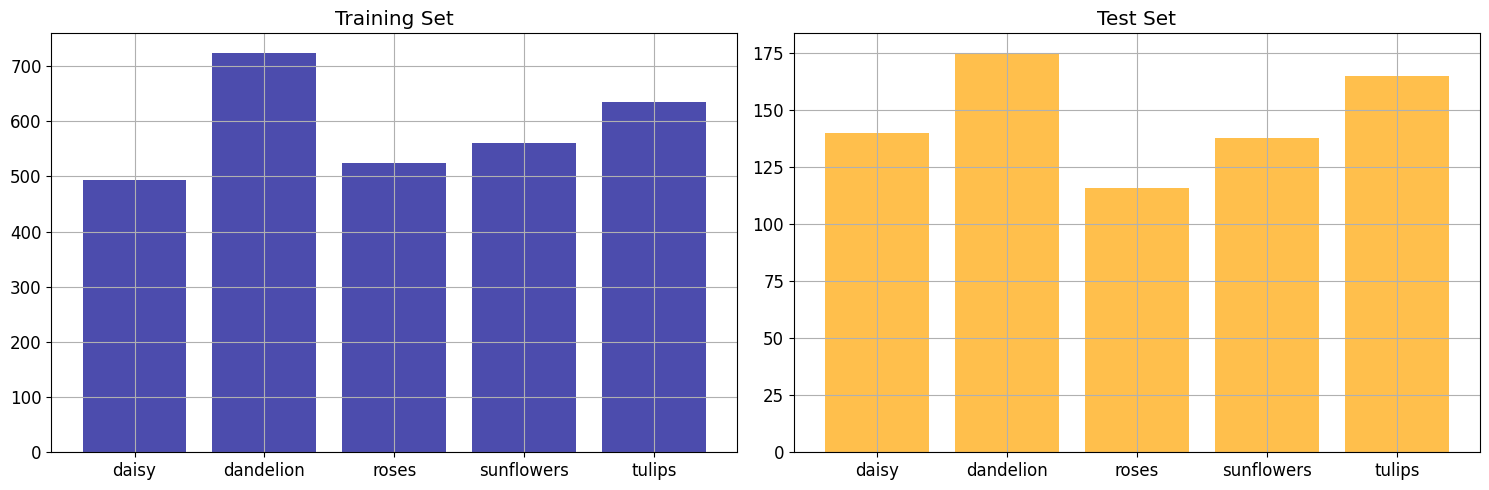

In [43]:
fn_plot_label(train_ds, test_ds)

In [46]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

## DATA AUGMENTAION

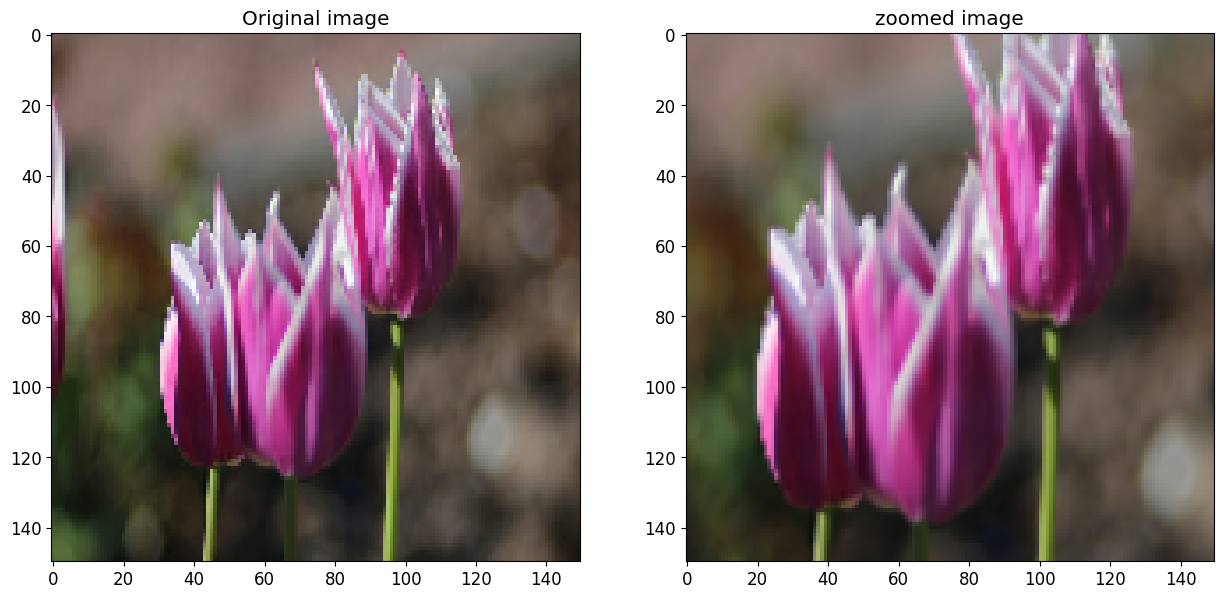

In [55]:
layer = tf.keras.layers.RandomZoom(height_factor = (-.2, -.2),
                                    width_factor= (-.2, -.2),
                                    seed=None,

)
plt.figure()

img_num = 1

for imgs, lbls in train_ds.take(1):
    out_image = layer(imgs)
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(imgs[img_num].numpy().astype('uint8')) # The method astype('uint8') converts the image data to the uint8 (unsigned 8-bit integer) type.

    plt.subplot(1, 2, 2)
    plt.title('zoomed image')
    plt.imshow(out_image[img_num].numpy().astype('uint8'))

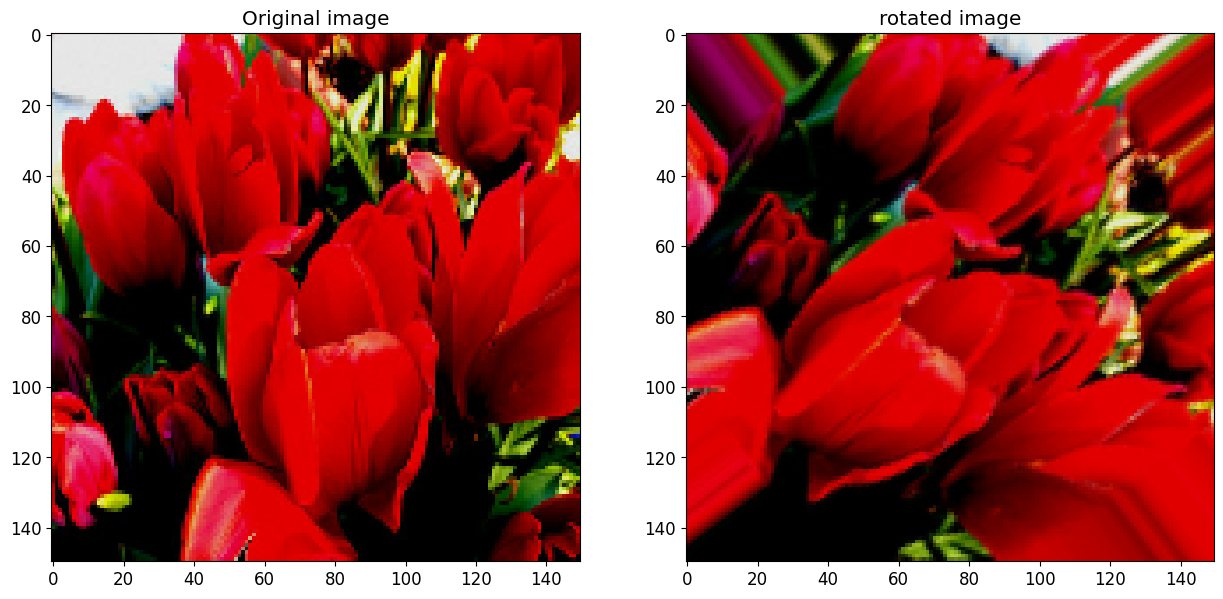

In [60]:
layer = tf.keras.layers.RandomRotation(
                                        (-.5,.5), # (-0.5, 0.5) specifies the random range of rotation in radians.
                                        fill_mode='nearest', #  fills the empty space after rotation by using the nearest pixel value.
                                        seed=RANDOM_STATE, )
plt.figure()

img_num = 1

for imgs, lbls in train_ds.take(1):
    out_image = layer(imgs)
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(imgs[img_num].numpy().astype('uint8')) # The method astype('uint8') converts the image data to the uint8 (unsigned 8-bit integer) type.

    plt.subplot(1, 2, 2)
    plt.title('rotated image')
    plt.imshow(out_image[img_num].numpy().astype('uint8'))

In [64]:
#### PREPROCESSING DATA
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#### API Call for Unsplash

In [ ]:
config = Config()
display(sonfig

### Reload best Weights for evaluation

### Evaluate the model

## Validate on the validation set